In [1]:
library(Seurat)

library(dplyr)
library(glue)
library(ggplot2)
library(patchwork)
library(cowplot)
library(stringr)
library(tidyr)
library("dplyr")
library(velocyto.R)
library(stringr)
library(SeuratWrappers)
load("6_18.RData")

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'glue'


The following object is masked from 'package:dplyr':

    collapse



Attaching package: 'cowplot'


The following object is masked from 'package:patchwork':

    align_plots


Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack




In [2]:
s.genes <- str_to_title(cc.genes$s.genes)
g2m.genes <- str_to_title(cc.genes$g2m.genes)


Warning message:
"The following features are not present in the object: Mlf1ip, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: Fam64a, Hn1, not searching for symbol synonyms"
Centering and scaling data matrix

Warning message in PrepDR(object = object, features = features, verbose = verbose):
"The following 3 features requested have not been scaled (running reduction without them): Mlf1ip, Fam64a, Hn1"
Warning message in irlba(A = t(x = object), nv = npcs, ...):
"You're computing too large a percentage of total singular values, use a standard svd instead."
PC_ 1 
Positive:  Mki67, Top2a, Birc5, Hmgb2, Cdca8, Cks2, Cks1b, Tpx2, Kif11, Ube2c 
	   Cdca3, Cenpf, Cdk1, Hmmr, Tubb4b, Nusap1, Rrm1, Smc4, Cenpa, Cenpe 
	   Aurkb, Gmnn, Kif20b, Clspn, Ckap2l, Tyms, Ncapd2, Cdc20, Ccnb2, Tmpo 
Negative:  Gas2l3, Ung, Msh2, Chaf1b, Cdca7, Ubr7, Casp8ap2, Ccne2, G2e3, Pold3 
	   Dscc1, Wdr76, Rfc2, Psrc1, Hells, Lbr, Gtse1, Ctcf, Exo1, Dt

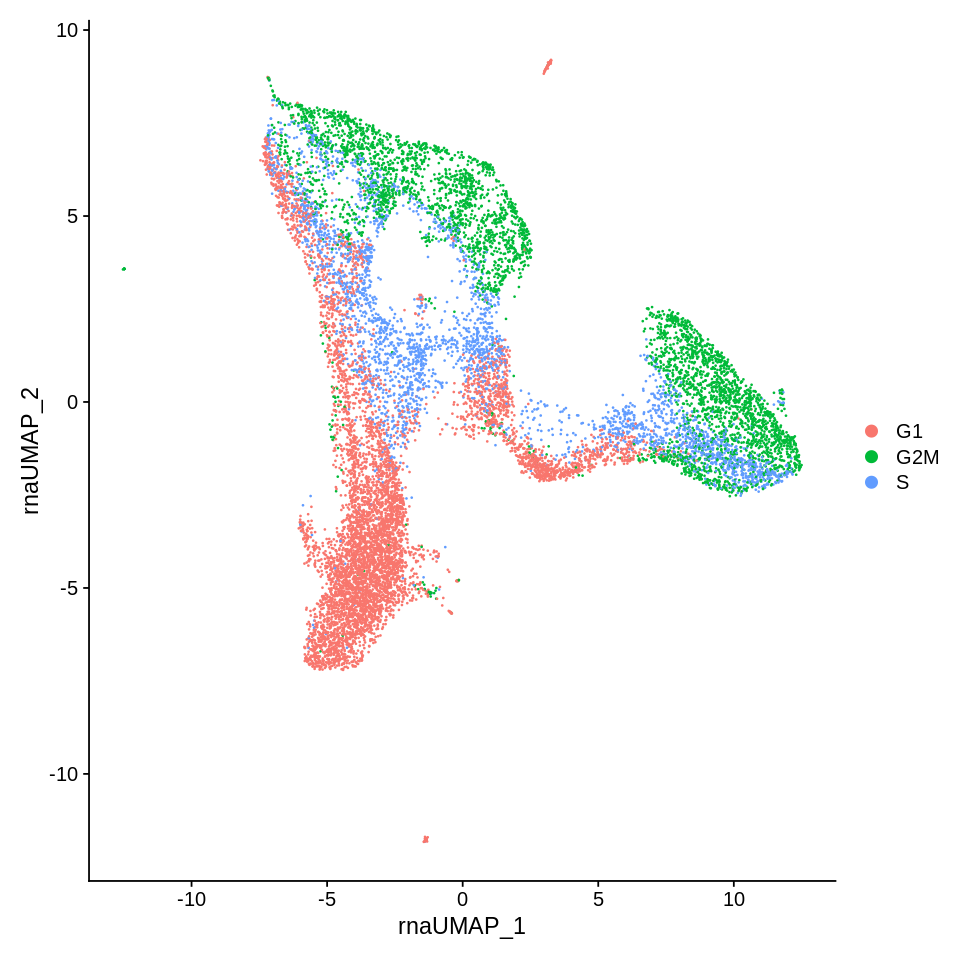

In [3]:
merged_obj <- CellCycleScoring(merged_obj, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)
DefaultAssay(merged_obj) <- 'RNA'
merged_obj <- NormalizeData(merged_obj) %>% FindVariableFeatures() %>% ScaleData(features = rownames(merged_obj)) %>% RunPCA(features = c(s.genes, g2m.genes))
options(repr.plot.width = 8, repr.plot.height = 8)
DimPlot(merged_obj)

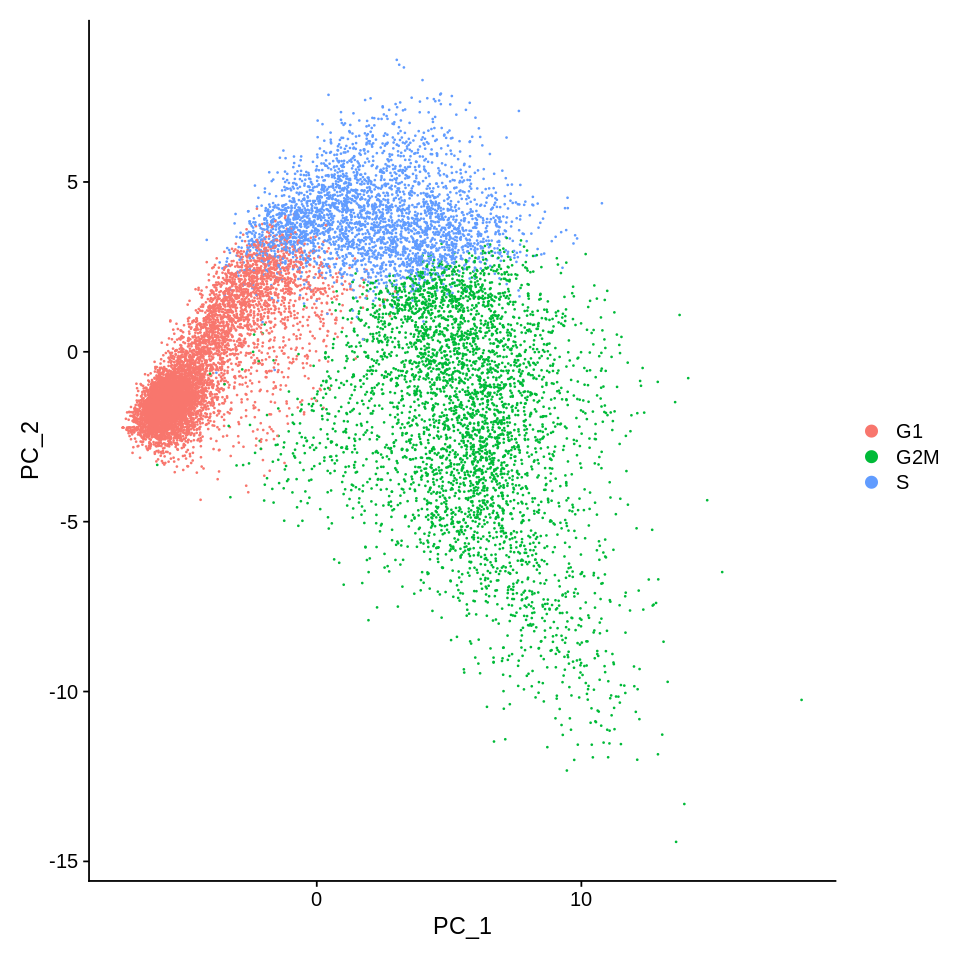

In [4]:
DimPlot(merged_obj,reduction="pca")